## (0) Carregando bibliotecas

In [1]:
# Display all results in a single notebook input:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import pysal
from pyproj import CRS
from shapely.geometry import Point, MultiPoint, Polygon, mapping
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from fiona.crs import from_epsg
import pickle

C:\Users\Jorge\Anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\Jorge\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [3]:
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11.4'

* **Lendo os equipamentos de saúde:**

In [4]:
eqs_saude = gpd.read_file('Equipam_saude_basicos_Itapagipe.shp')

In [5]:
eqs_saude.head(5)

,OBJECTID_1,OBJECTID,TEMA,MUN_CODMUN,LOG_CODLOG,PTN_NUMMET,PTN_SEQPTN,POS_POSICA,TPN_CODTEM,PTN_NOMPTN,...,PTN_DHULTI,PTN_DLEVAN,PTN_METADA,PTA_ABREV,verif_PMS,TIPO,ENDRECO,TELEFONES,Nome_PMS,geometry
0,3076.0,2975.0,SAUDE,2740.0,11440.0,0.0,0.0,2.0,18.0,UNIDADE DE SAUDE DA FAMILIA CENTRO OESTE (CAND...,...,2007-02-28,2006-06-01,6,USF CENT. OESTE (CANDIDO PEREIRA),sim,USF,Conj. Joanes Centro Oeste Qd. 18 L 17 Hamesa-L...,(71) 3611-5200 /01,USF Joanes Centro Oeste,POINT (-38.48865 -12.92635)
1,165.0,106.0,SAUDE,2740.0,1357.0,0.0,0.0,2.0,18.0,HOSPITAL S. JORGE,...,2003-12-31,None,6,HOSP. S. JORGE,não,HOSPITAL,None,None,HOSPITAL DA MULHER - MARIA L. C. DOS SANTOS,POINT (-38.50664 -12.93731)
2,727.0,580.0,SAUDE,2740.0,185.0,0.0,0.0,1.0,18.0,HOSPITAL GERAL - POLICIA MILITAR,...,2003-12-31,None,6,HOSP. GERAL - POL. MILITAR,não,HOSPITAL,None,None,HOSP. GERAL - POL. MILITAR,POINT (-38.50837 -12.93004)
3,730.0,583.0,SAUDE,2740.0,943.0,0.0,0.0,2.0,18.0,UNIDADE BASICA DE SAUDE MINISTRO ALKIMIN,...,2003-12-31,None,6,UBS MINISTRO ALKIMIN,sim,UBS,R Lopes Trovão s/n Massaranduba,(71) 3611-6561,CS Ministro Alckimin,POINT (-38.49807 -12.92845)
4,1873.0,2008.0,SAUDE,2740.0,539.0,0.0,0.0,1.0,18.0,UNIDADE BASICA DE SAUDE VIRGILIO DE CARVALHO,...,2003-12-31,None,6,UBS VIRGILIO DE CARVALHO,sim,UBS,R. Duarte da Costa s/n Dendezeiros,(71) 3611-6563,CS Virgílio de Carvalho\n,POINT (-38.50650 -12.92872)


In [46]:
eqs_saude.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Adicionando o Pronto Atendimento (PA):

In [83]:
pa = gpd.read_file('Pronto_atentimento_prox_Itapagipe.shp')

In [84]:
pa.head(5)

,OBJECTID_1,OBJECTID,TEMA,MUN_CODMUN,LOG_CODLOG,PTN_NUMMET,PTN_SEQPTN,POS_POSICA,TPN_CODTEM,PTN_NOMPTN,...,PTN_METADA,PTA_ABREV,verif_PMS,TIPO,ENDRECO,TELEFONES,Nome_PMS,Rede,SOS,geometry
0,417.0,269.0,SAUDE,2740.0,487.0,0.0,0.0,2.0,18.0,UNIDADE DE EMERGENCIA DO CURUZU,...,6,UNID. EMERG. CURUZU,não,PA,"Rua do Curuzu, S/N, Curuzu, Liberdade",(71)3256-1443,Unidade de Emergência Mãe Hilda Jitolu,público,s,POINT (555632.543 8568803.640)
1,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,...,None,None,sim,UPA,"R. do Forno, 1-121 - Santa Monica Salvador - B...",(71) 3256-2404 3481-8033,\nUPA San Martin (24h),público,s,POINT (556274.618 8568667.445)


In [85]:
pa.crs

<Projected CRS: EPSG:31984>
Name: SIRGAS 2000 / UTM zone 24S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - 42°W to 36°W
- bounds: (-42.0, -26.35, -36.0, 0.74)
Coordinate Operation:
- name: UTM zone 24S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [87]:
pa = pa.to_crs(CRS("WGS84"));

In [88]:
pa.crs == eqs_saude.crs

True

In [89]:
pa.columns

Index(['OBJECTID_1', 'OBJECTID', 'TEMA', 'MUN_CODMUN', 'LOG_CODLOG',
       'PTN_NUMMET', 'PTN_SEQPTN', 'POS_POSICA', 'TPN_CODTEM', 'PTN_NOMPTN',
       'SEQUENCIAL', 'CADASTRADO', 'GEORREFERE', 'PTN_DHULTI', 'PTN_DLEVAN',
       'PTN_METADA', 'PTA_ABREV', 'verif_PMS', 'TIPO', 'ENDRECO', 'TELEFONES',
       'Nome_PMS', 'Rede', 'SOS', 'geometry'],
      dtype='object')

In [98]:
eqs_saude.columns

Index(['OBJECTID_1', 'OBJECTID', 'TEMA', 'MUN_CODMUN', 'LOG_CODLOG',
       'PTN_NUMMET', 'PTN_SEQPTN', 'POS_POSICA', 'TPN_CODTEM', 'PTN_NOMPTN',
       'SEQUENCIAL', 'CADASTRADO', 'GEORREFERE', 'PTN_DHULTI', 'PTN_DLEVAN',
       'PTN_METADA', 'PTA_ABREV', 'verif_PMS', 'TIPO', 'ENDRECO', 'TELEFONES',
       'Nome_PMS', 'geometry'],
      dtype='object')

In [103]:
pa.drop(columns = ['Rede','SOS'], axis = 1, inplace = True)

In [104]:
pa.columns == eqs_saude.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [123]:
eqs_saude = eqs_saude.append(pa.iloc[0], ignore_index = True)

* **Lendo os bairros:**

In [7]:
brr = gpd.read_file('Bairros_Lei_9278_2017.shp')

In [8]:
brr = brr.to_crs(CRS("WGS84"));

* Plotando:

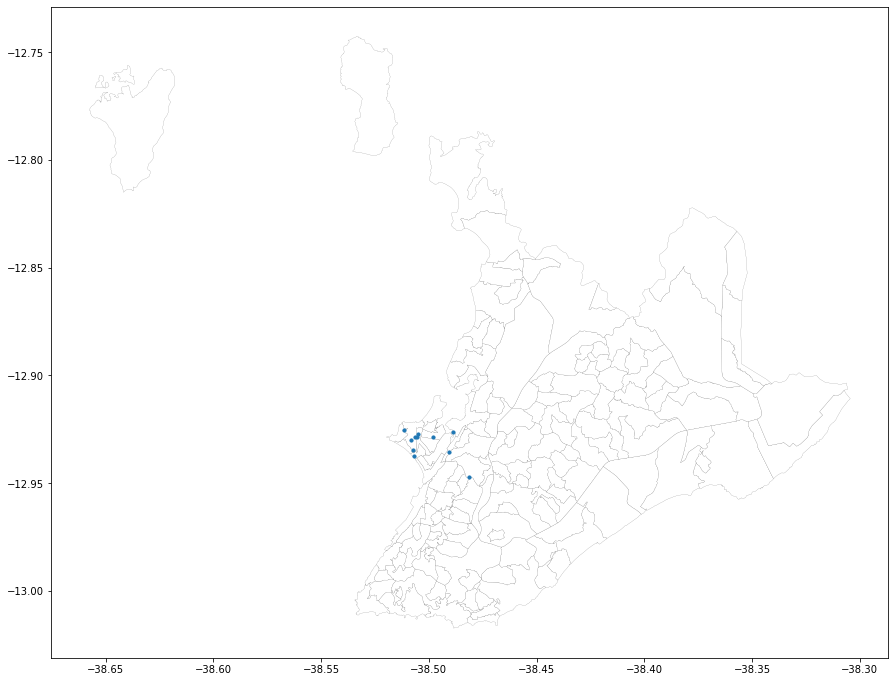

In [9]:
fig, ax = plt.subplots(figsize = (15,15))
brr.plot(ax = ax, color = 'white', edgecolor = 'k', linewidth = 0.1);
eqs_saude.plot(ax = ax, markersize = 10);
plt.show();

# (1) Criando a rede

In [10]:
print(eqs_saude['geometry'].unary_union.convex_hull)

POLYGON ((-38.48117575224568 -12.94700727776932, -38.50663938827871 -12.93731171575714, -38.51164972271942 -12.92518239565688, -38.4886529338899 -12.92635390316415, -38.48117575224568 -12.94700727776932))


In [11]:
cent = eqs_saude['geometry'].unary_union.convex_hull.centroid
bbox = ox.core.bbox_from_point((cent.y,cent.x), distance=3000, project_utm=False, return_crs=False)

In [12]:
bbox

(-12.90702923018794, -12.96128369302988, -38.4683178511571, -38.52363059115025)

In [45]:
G = ox.graph_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3], network_type='walk')
#G = ox.graph_from_point(location_point, distance=750, distance_type='bbox', network_type='drive')

In [14]:
eqs_saude['TIPO'].value_counts()
tipo = list(eqs_saude['TIPO'].unique())
tipo

HOSPITAL    5
USF         2
UBS         2
UPA         1
CAPS        1
Name: TIPO, dtype: int64

['USF', 'HOSPITAL', 'UBS', 'UPA', 'CAPS']

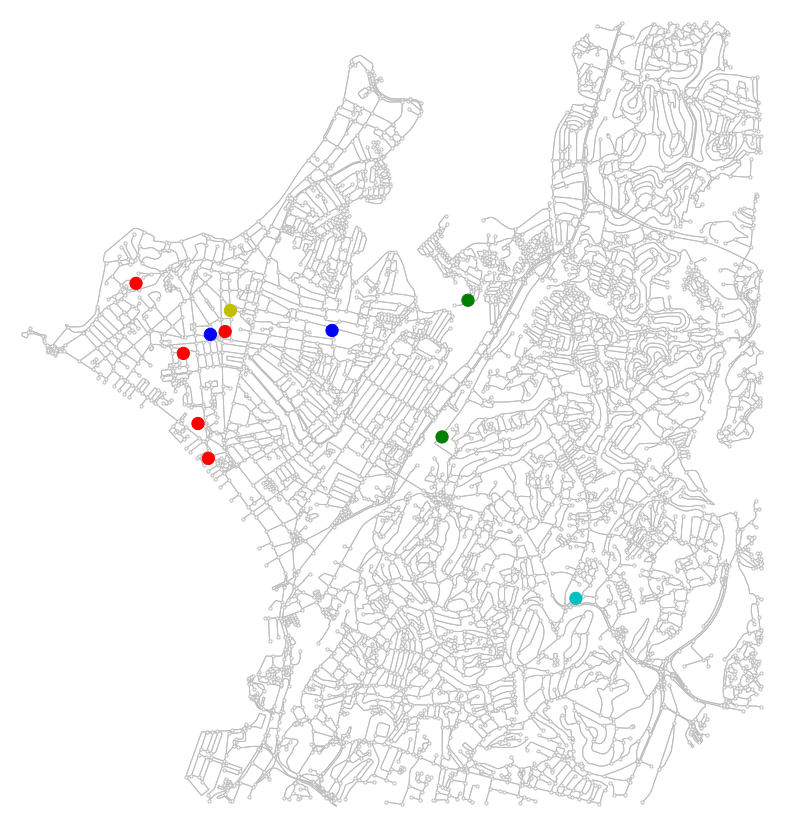

In [15]:
nc = ['g' if i==tipo[0] else 'r' if i==tipo[1] else 'b' if i==tipo[2] else 'c' if i==tipo[3] else 'y' for i in eqs_saude['TIPO']]
fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor="#BEBEBE", node_size=10, fig_height = 15,
                        edge_linewidth=1, edge_color = "#BEBEBE", node_zorder=2, show=False, close=False);
eqs_saude.plot(ax = ax, color = nc, markersize = 150, zorder = 3);
plt.show();

## (2) Nós mais próximos dos equipamentos

### (2.1) PA e UPA:

* **Nós mais próximo do PA ou UPA:**

In [124]:
#nn = ox.geo_utils.get_nearest_node(G, (eqs_saude.loc[9,'geometry'].x, eqs_saude.loc[9,'geometry'].y), method='haversine')
nn = ox.geo_utils.get_nearest_nodes(G, list(eqs_saude[eqs_saude['TIPO'].isin(['PA','UPA'])]['geometry'].x),
                                     list(eqs_saude[eqs_saude['TIPO'].isin(['PA','UPA'])]['geometry'].y), method=None)

In [125]:
nn

array([7248279552, 1051209554], dtype=int64)

* **Caminhos mais curtos até o PA ou UPAs:**

In [126]:
sp = np.zeros((len(G.nodes()),len(nn)))
for i, n in enumerate(G.nodes()):
    for j, v in enumerate(nn):
        sp[i,j] = nx.shortest_path_length(G, n, v, weight = 'length')

In [127]:
sp = sp.min(1)

In [128]:
sp = {n:sp for (n, sp) in zip(G.nodes(), sp)}

In [129]:
nx.set_node_attributes(G, sp, 'd_UPA')

In [130]:
#sp = []
#for i, n in enumerate(G.nodes()):
#    sp.append(nx.shortest_path_length(G, n, nn, weight = 'length'))

In [53]:
#sp = {n:sp for (n, sp) in zip(G.nodes(), sp)}

In [54]:
#nx.set_node_attributes(G, sp, 'd_UPA')

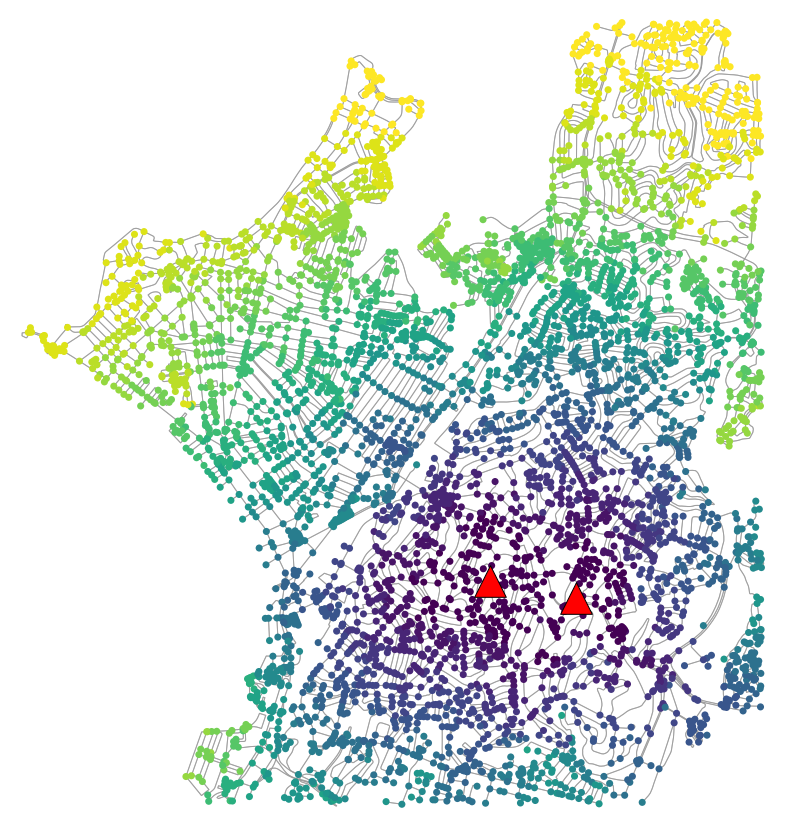

In [131]:
colors = ox.get_node_colors_by_attr(G, 'd_UPA', cmap='viridis', num_bins=20);
fig, ax = ox.plot_graph(G, node_color=colors, edge_alpha=0.75, node_size=50, fig_height = 15,
                        edge_linewidth=1, node_zorder=2, show=False, close=False);
eqs_saude[eqs_saude['TIPO'].isin(['PA','UPA'])].plot(ax = ax, color = 'red', edgecolor = 'k', markersize = 1000, marker = '^', zorder = 3)
plt.show();

### (2.2) UPS:

* **Nós mais próximo das UBS:**

In [64]:
#nn = ox.geo_utils.get_nearest_node(G, (eqs_saude.loc[9,'geometry'].x, eqs_saude.loc[9,'geometry'].y), method='haversine')
nn = ox.geo_utils.get_nearest_nodes(G, list(eqs_saude[eqs_saude['TIPO']=='UBS']['geometry'].x),
                                     list(eqs_saude[eqs_saude['TIPO']=='UBS']['geometry'].y), method=None)

In [65]:
nn

array([5367470930, 3942904502], dtype=int64)

* **Caminhos mais curtos até a UBS mais próxima:**

In [67]:
sp = np.zeros((len(G.nodes()),len(nn)))
for i, n in enumerate(G.nodes()):
    for j, v in enumerate(nn):
        sp[i,j] = nx.shortest_path_length(G, n, v, weight = 'length')

In [68]:
sp = sp.min(1)

In [69]:
sp = {n:sp for (n, sp) in zip(G.nodes(), sp)}

In [70]:
nx.set_node_attributes(G, sp, 'd_UBS')

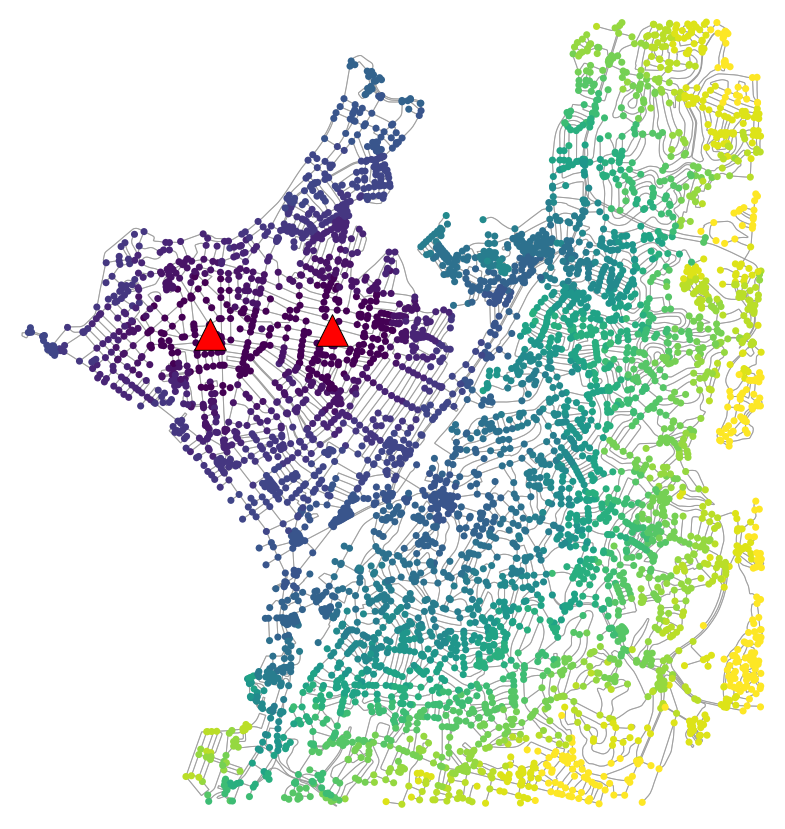

In [71]:
colors = ox.get_node_colors_by_attr(G, 'd_UBS', cmap='viridis', num_bins=20);
fig, ax = ox.plot_graph(G, node_color=colors, edge_alpha=0.75, node_size=50, fig_height = 15,
                        edge_linewidth=1, node_zorder=2, show=False, close=False);
eqs_saude[eqs_saude['TIPO']=='UBS'].plot(ax = ax, color = 'red', edgecolor = 'k', markersize = 1000, marker = '^', zorder = 3)
plt.show();

### (2.3) Hospitais:

* **Nós mais próximo das Hospitais:**

In [72]:
#nn = ox.geo_utils.get_nearest_node(G, (eqs_saude.loc[9,'geometry'].x, eqs_saude.loc[9,'geometry'].y), method='haversine')
nn = ox.geo_utils.get_nearest_nodes(G, list(eqs_saude[eqs_saude['TIPO']=='HOSPITAL']['geometry'].x),
                                    list(eqs_saude[eqs_saude['TIPO']=='HOSPITAL']['geometry'].y), method=None)

In [73]:
nn

array([7281168305, 6315585406, 7227533611, 4265482943, 1005901268],
      dtype=int64)

* **Caminhos mais curtos até o Hospital mais próximo:**

In [74]:
len(G.nodes())

5214

In [75]:
sp = np.zeros((len(G.nodes()),len(nn)))
for i, n in enumerate(G.nodes()):
    for j, v in enumerate(nn):
        sp[i,j] = nx.shortest_path_length(G, n, v, weight = 'length')

In [76]:
sp = sp.min(1)

In [77]:
sp = {n:sp for (n, sp) in zip(G.nodes(), sp)}

In [78]:
nx.set_node_attributes(G, sp, 'd_HOSP')

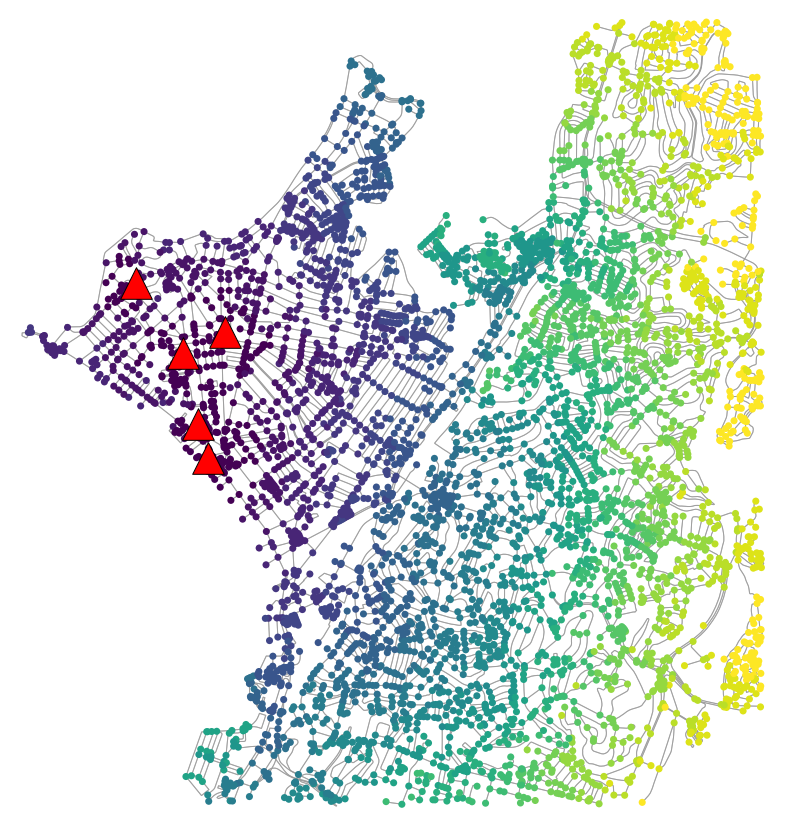

In [79]:
colors = ox.get_node_colors_by_attr(G, 'd_HOSP', cmap='viridis', num_bins=20);
fig, ax = ox.plot_graph(G, node_color=colors, edge_alpha=0.75, node_size=50, fig_height = 15,
                        edge_linewidth=1, node_zorder=2, show=False, close=False);
eqs_saude[eqs_saude['TIPO']=='HOSPITAL'].plot(ax = ax, color = 'red', edgecolor = 'k', markersize = 1000, marker = '^', zorder = 3)
plt.show();

### (2.4) Salvando em Shapefile

In [132]:
G_gdf = ox.graph_to_gdfs(G, nodes=True, edges=True) 

In [133]:
G_gdf[0]

,y,x,osmid,d_UPA,d_UBS,d_HOSP,highway,geometry
6806323210,-12.910746,-38.495357,6806323210,5368.600,2408.512,2594.626,NaN,POINT (-38.49536 -12.91075)
6806323220,-12.912211,-38.494841,6806323220,5191.104,2231.016,2417.130,NaN,POINT (-38.49484 -12.91221)
7233536022,-12.948362,-38.501677,7233536022,2157.759,2428.798,1404.019,NaN,POINT (-38.50168 -12.94836)
6806323228,-12.911169,-38.495146,6806323228,5321.707,2361.619,2547.733,NaN,POINT (-38.49515 -12.91117)
7233536042,-12.940833,-38.490766,7233536042,1051.606,2133.210,2405.953,NaN,POINT (-38.49077 -12.94083)
...,...,...,...,...,...,...,...,...
3075899290,-12.907982,-38.475749,3075899290,5228.472,4727.292,5503.451,NaN,POINT (-38.47575 -12.90798)
3028074397,-12.952486,-38.503704,3028074397,3035.430,3534.320,2509.541,NaN,POINT (-38.50370 -12.95249)
3075899294,-12.908728,-38.476345,3075899294,5096.909,4645.507,5421.666,NaN,POINT (-38.47634 -12.90873)
7279853518,-12.958509,-38.483220,7279853518,2578.393,5347.314,4530.571,NaN,POINT (-38.48322 -12.95851)


In [134]:
G_gdf[0].to_file('rede_itpg_nodes.shp')

In [135]:
G_gdf[1]

,u,v,key,osmid,oneway,highway,length,geometry,name,lanes,maxspeed,tunnel,service,access,bridge,junction,width
0,6806323210,4265482917,0,427316496,False,secondary_link,22.732,"LINESTRING (-38.49536 -12.91075, -38.49541 -12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6806323210,3942935988,0,427316496,False,secondary_link,17.547,"LINESTRING (-38.49536 -12.91075, -38.49531 -12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6806323210,6806323220,0,725946687,False,service,177.496,"LINESTRING (-38.49536 -12.91075, -38.49539 -12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6806323220,838575394,0,439250016,False,secondary,18.828,"LINESTRING (-38.49484 -12.91221, -38.49482 -12...",Largo da Ribeira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6806323220,3942935989,0,439250016,False,secondary,73.462,"LINESTRING (-38.49484 -12.91221, -38.49512 -12...",Largo da Ribeira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14301,3075899294,3000692188,0,296271155,False,service,192.027,"LINESTRING (-38.47634 -12.90873, -38.47638 -12...",Alameda A 06,NaN,NaN,NaN,alley,NaN,NaN,NaN,NaN
14302,3075899294,6366506352,0,303245404,False,steps,45.504,"LINESTRING (-38.47634 -12.90873, -38.47613 -12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14303,7279853518,975475111,0,83754671,False,residential,15.893,"LINESTRING (-38.48322 -12.95851, -38.48317 -12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14304,619741177,7261175086,0,298218872,False,trunk,133.796,"LINESTRING (-38.49848 -12.96053, -38.49857 -12...",Via Expressa Baía de Todos os Santos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
for i in list(G_gdf[1].columns):
    tp = []
    for j in G_gdf[1][i]:
        tp.append(isinstance(j, list))
    print(i,sum(tp))

u 0
v 0
key 0
osmid 880
oneway 0
highway 266
length 0
geometry 0
name 274
lanes 0
maxspeed 4
tunnel 0
service 0
access 0
bridge 0
junction 0
width 0


In [137]:
G_gdf[1].drop(columns=['osmid','highway','name','maxspeed']).to_file('rede_itpg_links.shp')